In [1]:
import torch
import numpy as np
import gym
import matplotlib.pyplot as plt
from ppo import PPOAgent
from IPython import display
from collections import deque
%matplotlib inline

c:\Users\aljos\miniconda3\envs\drlnd\lib\site-packages\gym\core.py:27: UserWarning: WARN: Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+
  "Gym minimally supports python 3.6 as the python foundation not longer supports the version, please update your version to 3.7+"


In [2]:
env = gym.make('LunarLander-v2')
eval_env = gym.make('LunarLander-v2')
action_space = env.action_space.n
state_space = env.observation_space.shape[0]

In [3]:
# print action and state space
print('Action space:', action_space)
print('State space:', state_space)

Action space: 4
State space: 8


In [4]:
agent = PPOAgent(state_space, action_space)

Episode 100	Average Score: -148.83 	Current Eval Score: -852.88
Episode 200	Average Score: -163.37 	Current Eval Score: -374.50
Episode 300	Average Score: -73.80 	Current Eval Score: -328.724
Episode 400	Average Score: -30.10 	Current Eval Score: -256.51
Episode 500	Average Score: 25.51 	Current Eval Score: -176.377
Episode 600	Average Score: 30.44 	Current Eval Score: -152.14
Episode 700	Average Score: 75.38 	Current Eval Score: -73.475
Episode 800	Average Score: 130.77 	Current Eval Score: 29.605
Episode 900	Average Score: 169.09 	Current Eval Score: 119.02
Episode 1000	Average Score: 176.57 	Current Eval Score: 166.78
Episode 1100	Average Score: 184.58 	Current Eval Score: 177.95
Episode 1144	Average Score: 200.47 	Current Eval Score: 172.65
Environment solved in 1044 episodes!	Average Score: 200.47 	Current Eval Score: 172.65


Text(0.5, 1.0, 'Evaluation Scores')

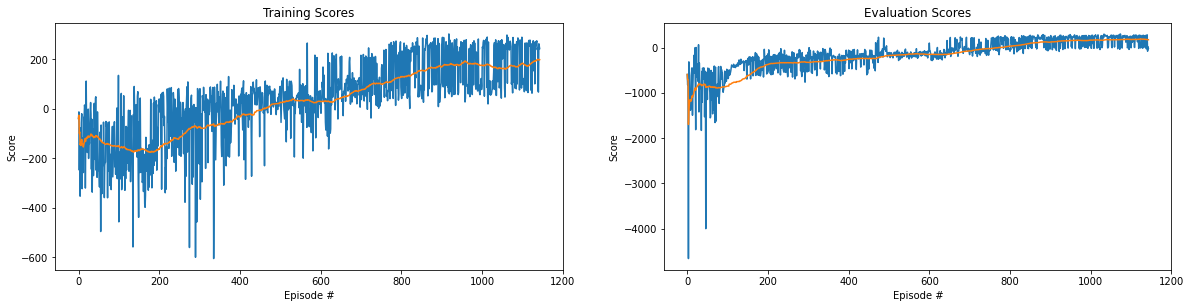

In [5]:
# training loop
scores = []
eval_scores = []
scores_window = deque(maxlen=100)
scores_window_eval = deque(maxlen=100)

n_episodes = 2000
max_t = 2000

for i_episode in range(1, n_episodes+1):

    score = 0
    state, _ = env.reset()

    traj_len = 0

    dones = False

    while not dones:

        action, prob = agent.act(state, deterministic=False)
        next_state, reward, dw, truncated, info = env.step(action)
        dones = dw or truncated

        if reward <= -100:
            reward = -30

        agent.step(state, action, reward, next_state, dones, dw, prob, traj_len)
        state = next_state
        score += reward

        traj_len += 1

        if dones:
            break
    
    # training after gathering full trajectory
    agent.train()
    agent.buffer.clear()

    current_eval_score = agent.evaluate(eval_env, deterministic=True)
    eval_scores.append(current_eval_score)
    scores_window_eval.append(current_eval_score)

    scores_window.append(score)
    scores.append(score)

    print('\rEpisode {}\tAverage Score: {:.2f} \tCurrent Eval Score: {:.2f}'.format(i_episode, np.mean(scores_window), np.mean(scores_window_eval)), end="")

    if i_episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f} \tCurrent Eval Score: {:.2f}'.format(i_episode, np.mean(scores_window), np.mean(scores_window_eval)))

    if np.mean(scores_window) >= 200.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f} \tCurrent Eval Score: {:.2f}'.format(i_episode-100, np.mean(scores_window), np.mean(scores_window_eval)))
        break


running_mean = []
for i in range(len(scores)):
    if i < 100:
        running_mean.append(np.mean(scores[:i+1]))
    else:
        running_mean.append(np.mean(scores[i-100:i]))


running_mean_eval = []
for i in range(len(eval_scores)):
    if i < 100:
        running_mean_eval.append(np.mean(eval_scores[:i+1]))
    else:
        running_mean_eval.append(np.mean(eval_scores[i-100:i]))

# plot the scores
fig = plt.figure(figsize=(20, 10))
# subplot 1
ax1 = fig.add_subplot(221)
plt.plot(np.arange(len(scores)), scores)
plt.plot(np.arange(len(running_mean)), running_mean)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Training Scores')
# subplot 2
ax2 = fig.add_subplot(222)
plt.plot(np.arange(len(eval_scores)), eval_scores)
plt.plot(np.arange(len(running_mean_eval)), running_mean_eval)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Evaluation Scores')
